## Breast Cancer Diagnosis Prediction using SVM with RBF Kernel

## Import the Necessary Libraries

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the input data
raw_data = pd.read_csv('breast-cancer.csv')
print("There are " + str(len(raw_data)) + " observations in the breast cancer dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 569 observations in the breast cancer dataset.
There are 32 variables in the dataset.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Preprocessing

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
raw_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
raw_data.drop(columns='id',inplace=True)

In [7]:
raw_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
diagnosis_counts = raw_data["diagnosis"].value_counts()

# Display the counts
print(diagnosis_counts)

diagnosis
B    357
M    212
Name: count, dtype: int64


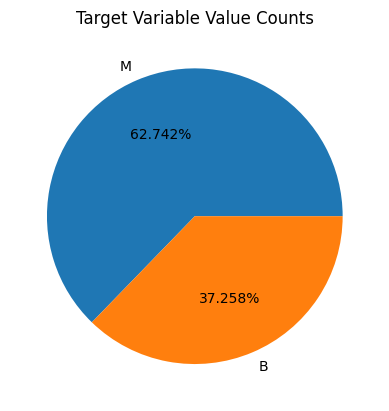

In [9]:
# get the set of distinct classes
labels = raw_data.diagnosis.unique()

# get the count of each class
sizes = raw_data.diagnosis.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

### Feature Selection

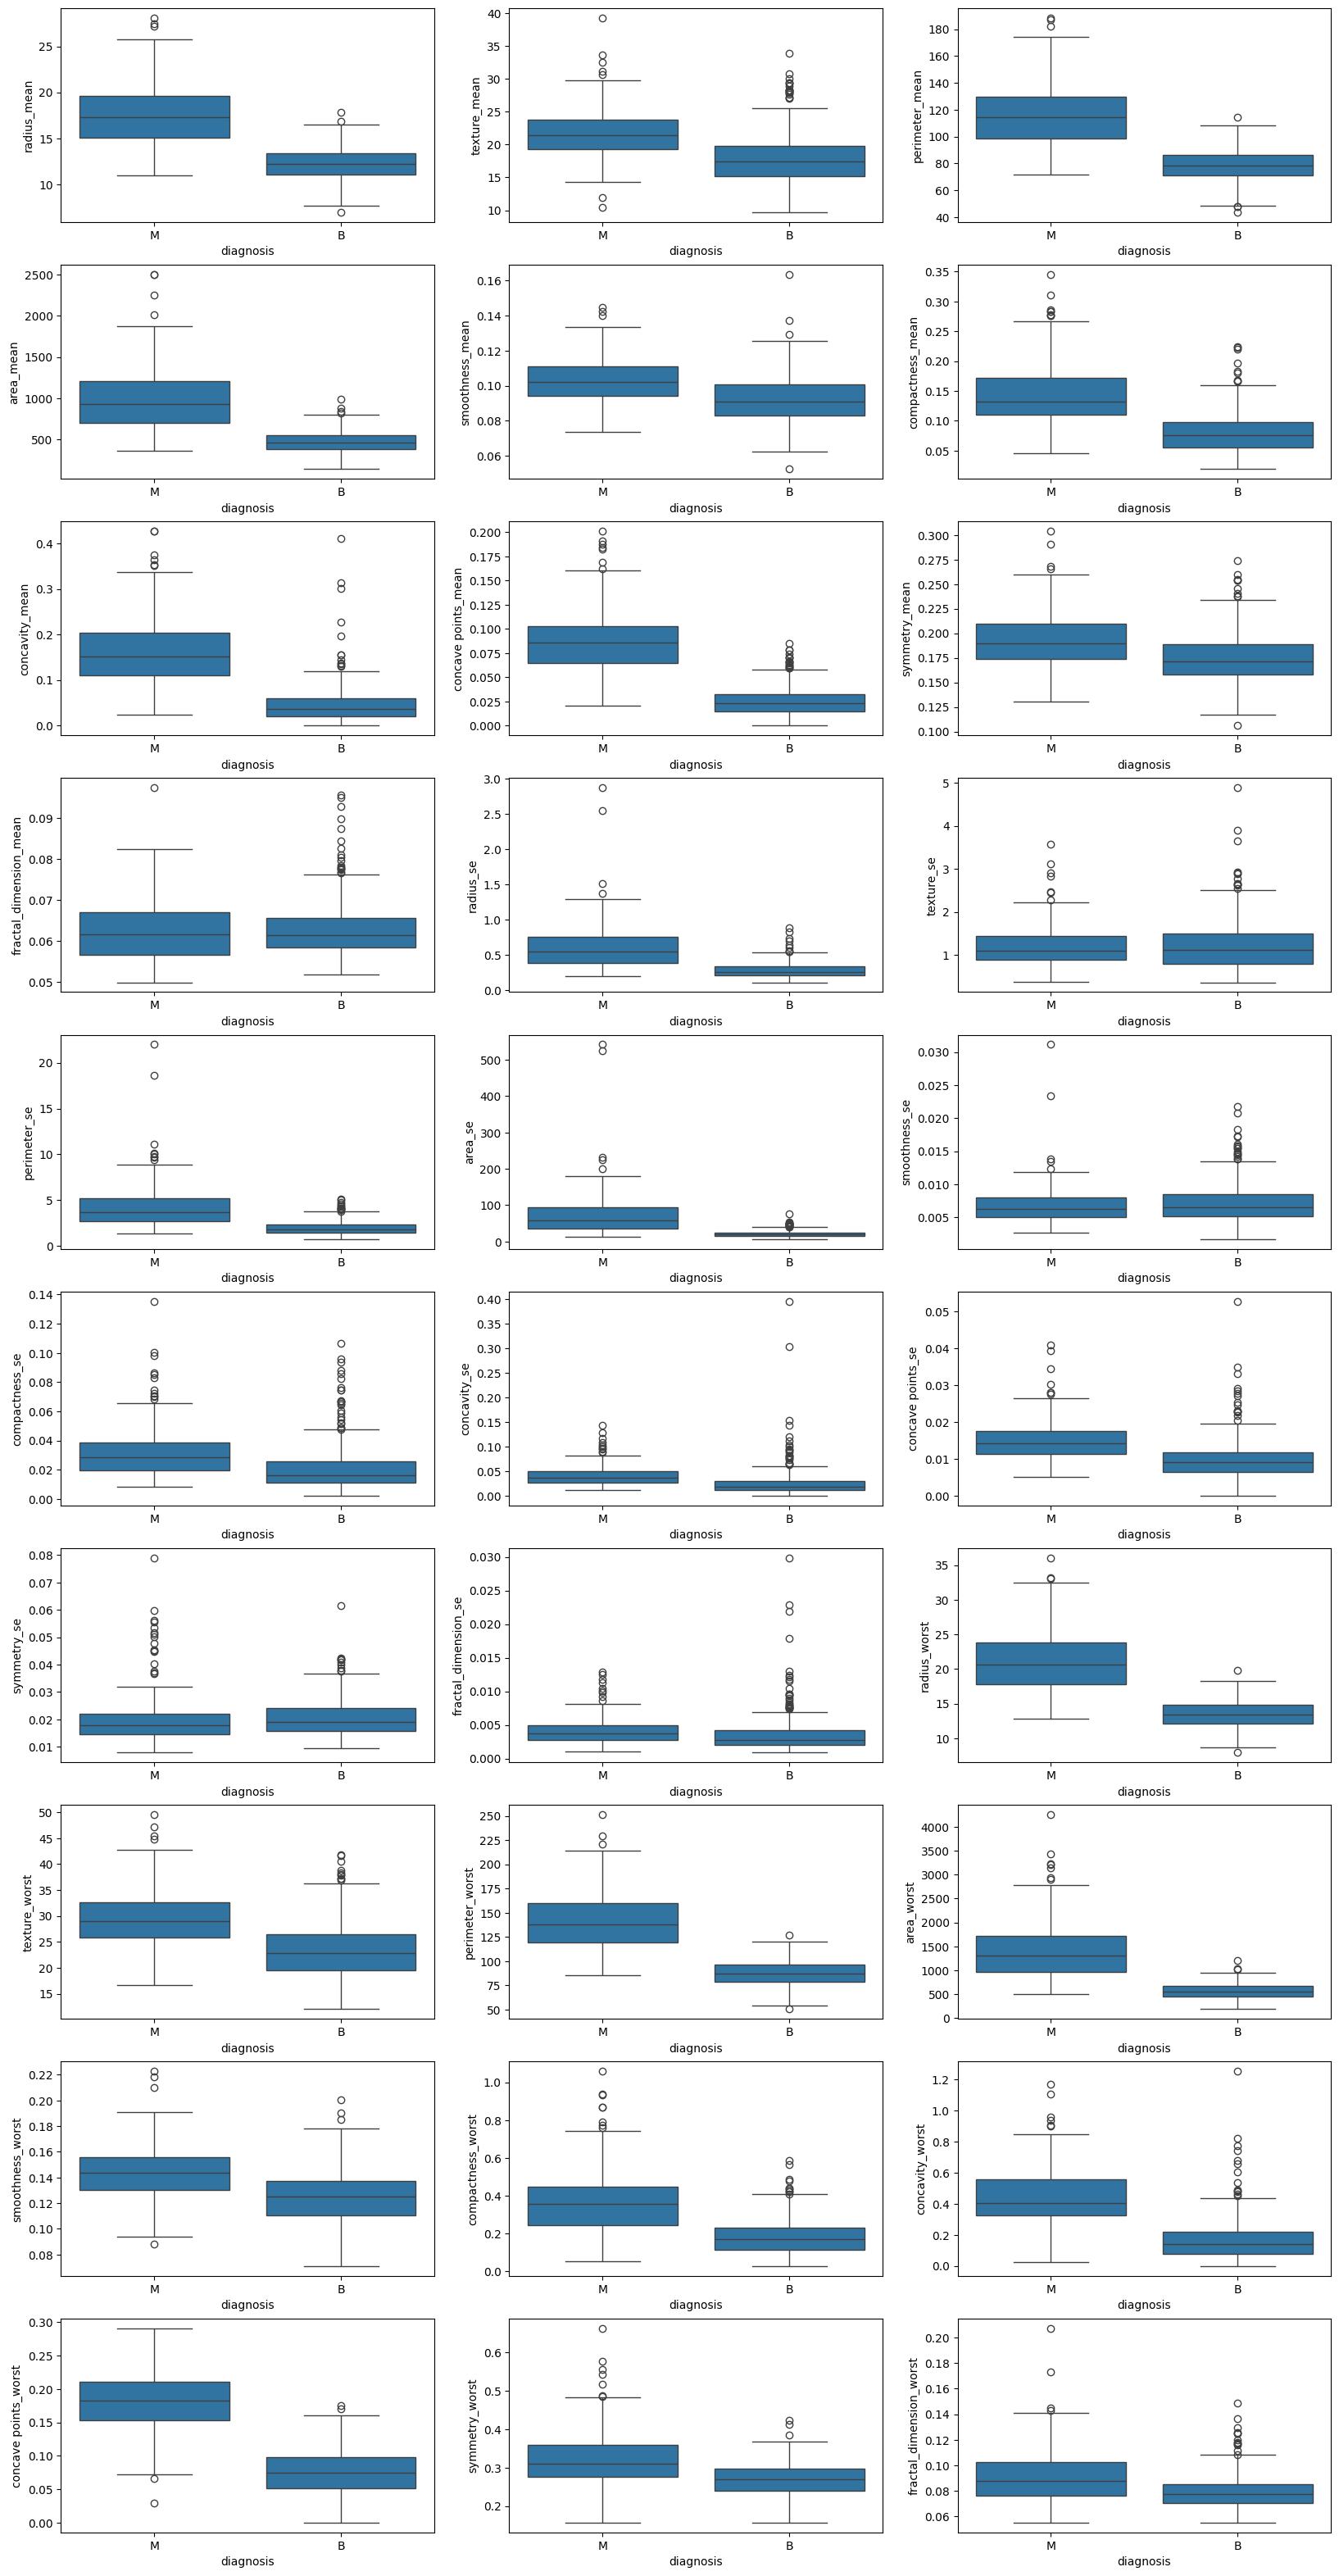

In [10]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(raw_data.columns[1:]):
    # df[col]=np.log(df[col])
    sns.boxplot(x='diagnosis',y=col,data=raw_data,ax=ax[i])

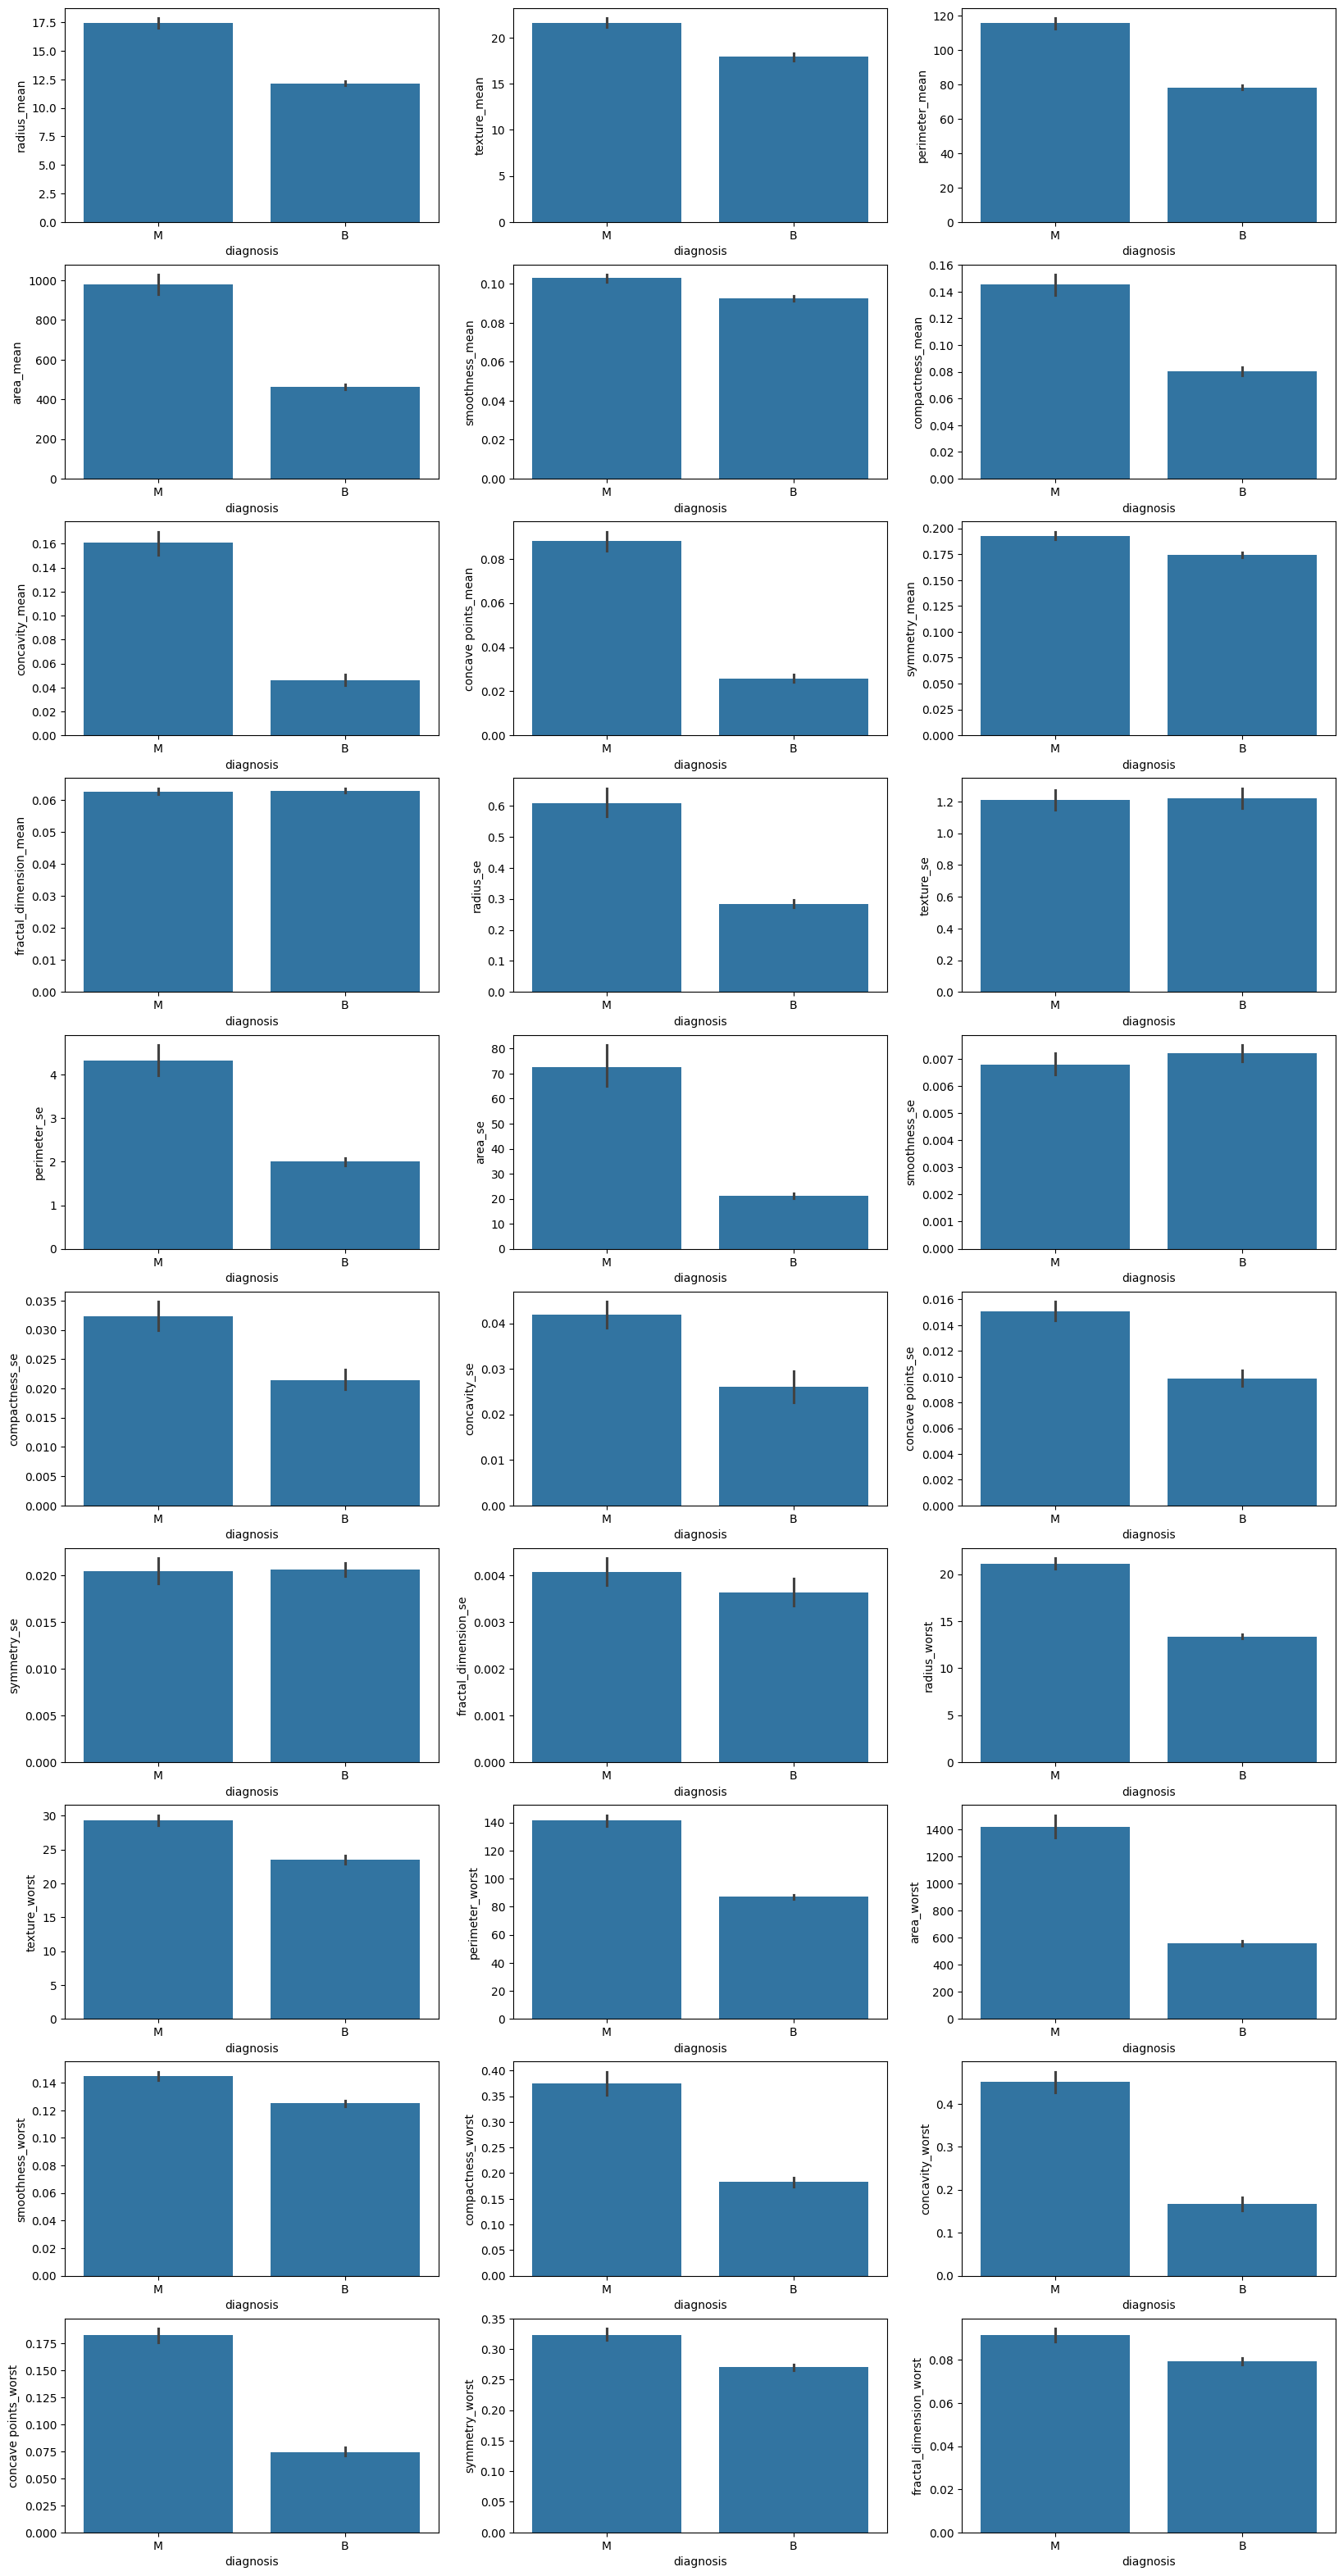

In [11]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(raw_data.columns[1:]):
    # df[col]=np.log(df[col])
    sns.barplot(x='diagnosis',y=col,data=raw_data,ax=ax[i])

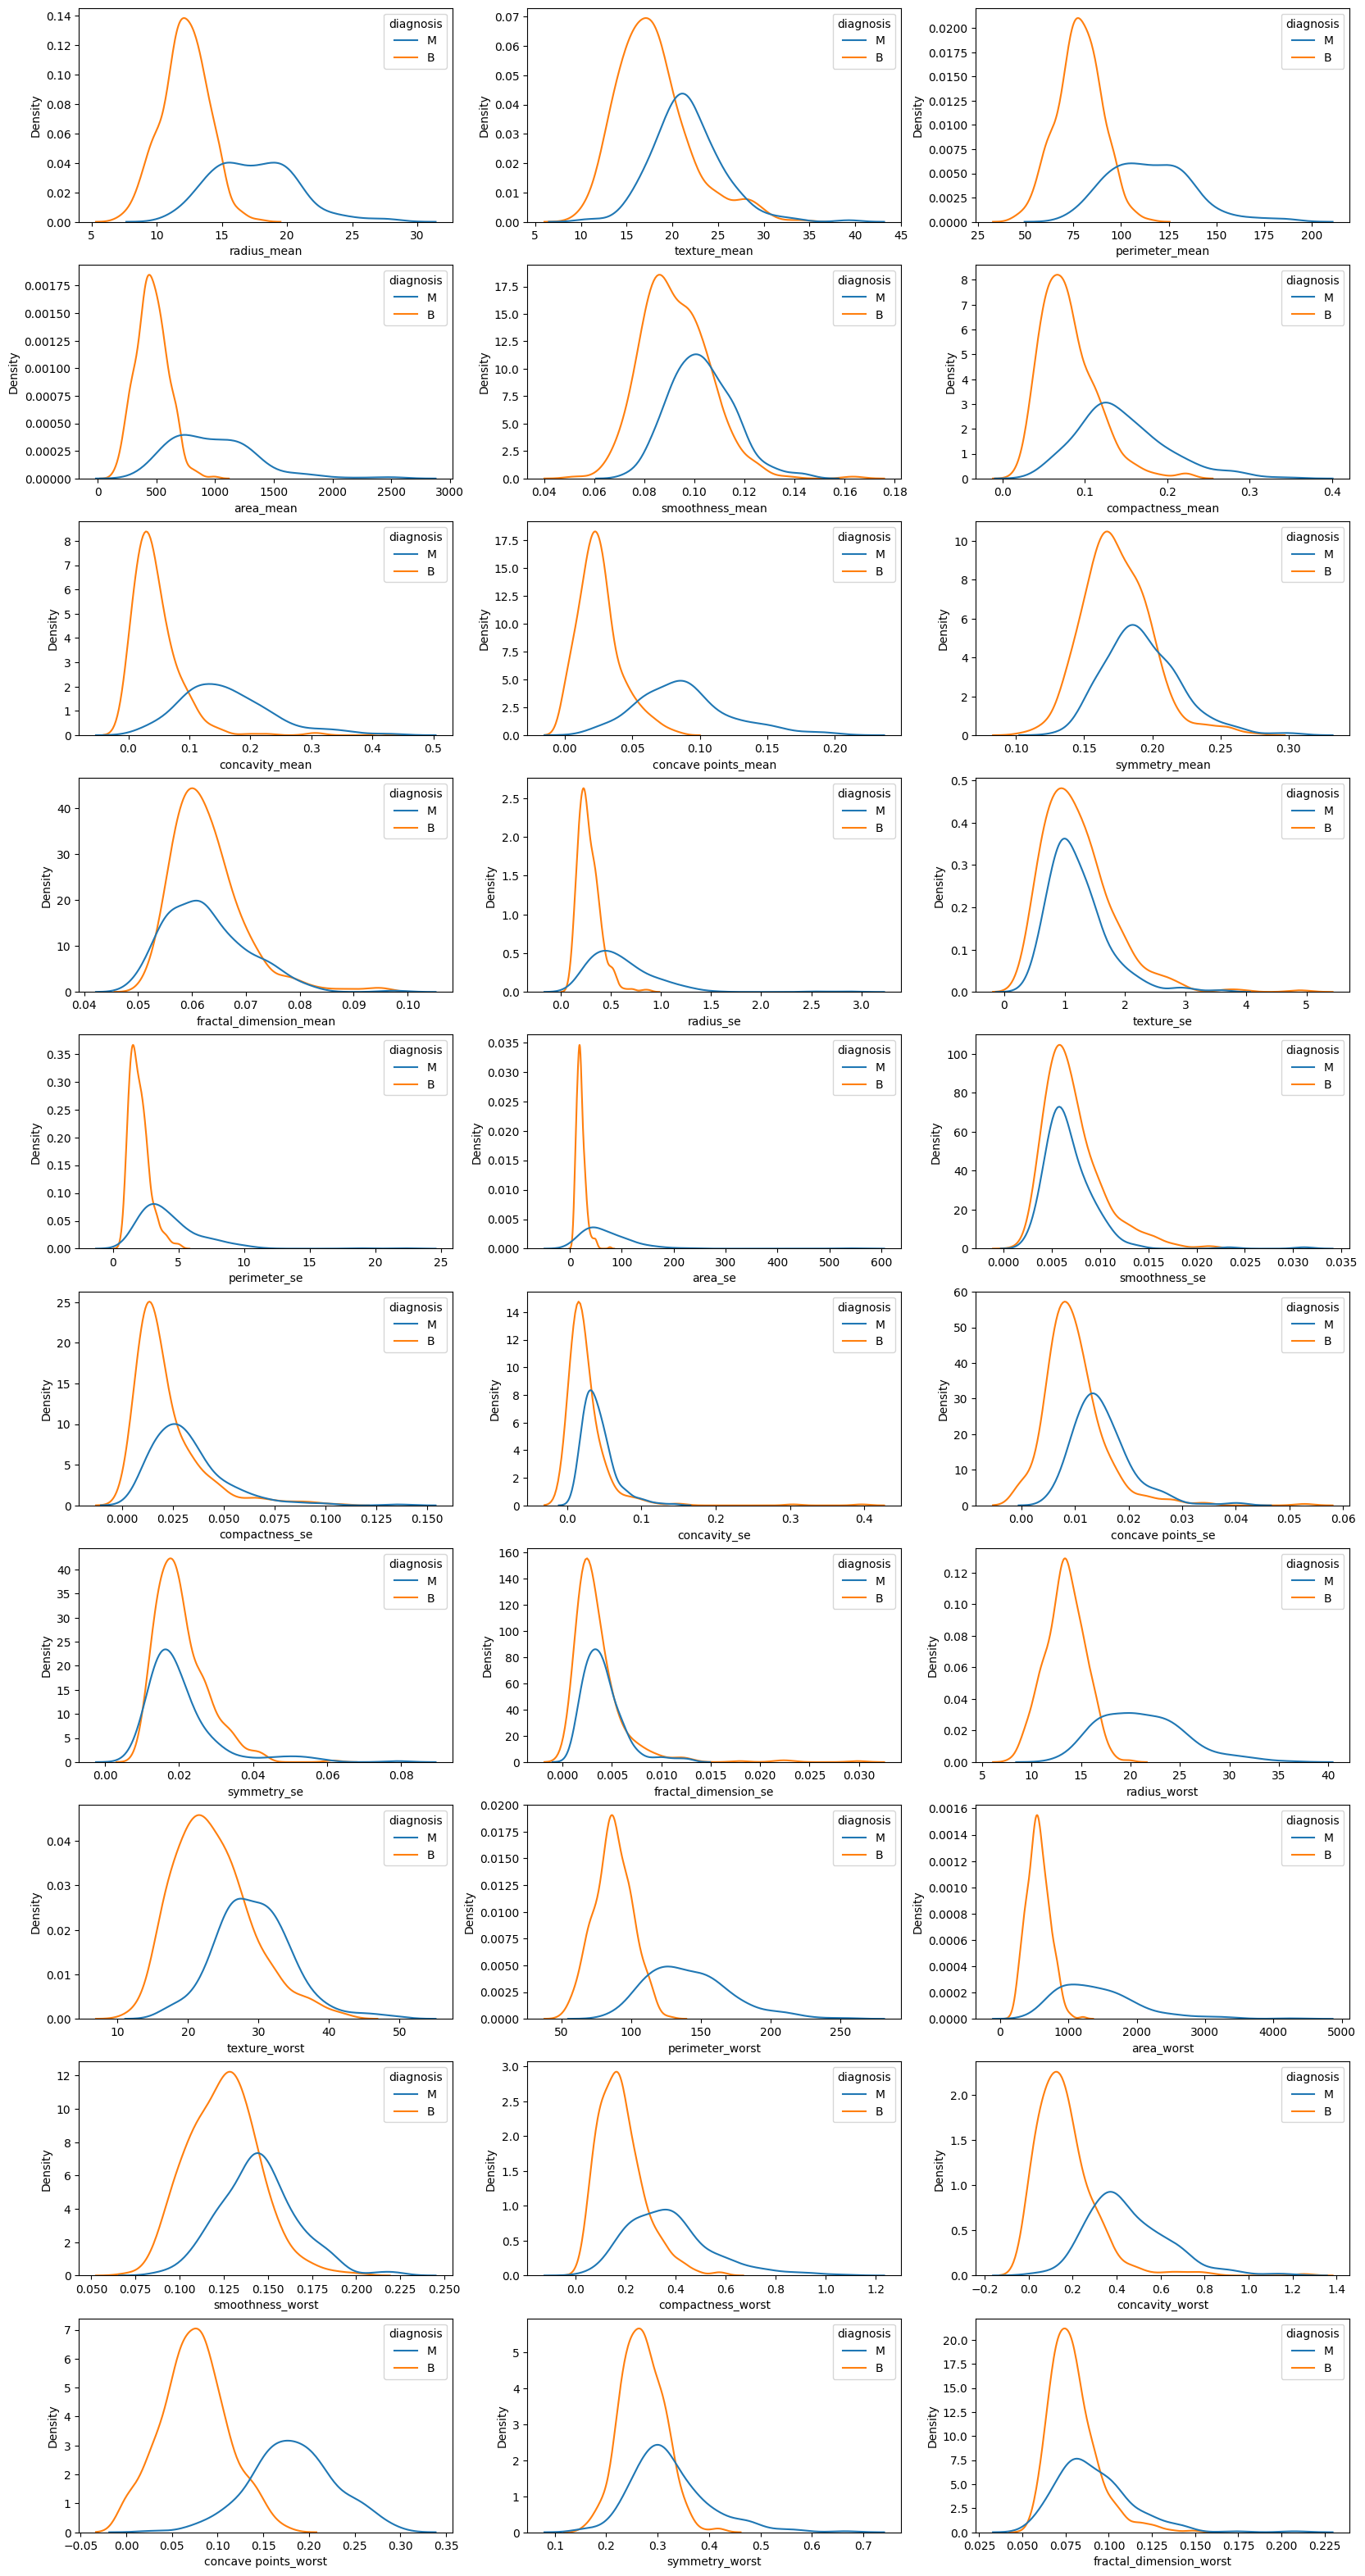

In [12]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(raw_data.columns[1:]):
    # df[col]=np.log(df[col])
    sns.kdeplot(x=col,data=raw_data,ax=ax[i],hue='diagnosis')

In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'diagnosis' column
raw_data['diagnosis_encoded'] = label_encoder.fit_transform(raw_data['diagnosis'])

# Display the encoded values
print(raw_data[['diagnosis', 'diagnosis_encoded']].head())

  diagnosis  diagnosis_encoded
0         M                  1
1         M                  1
2         M                  1
3         M                  1
4         M                  1


In [14]:
diagnosis_counts = raw_data["diagnosis_encoded"].value_counts()

# Display the counts
print(diagnosis_counts)

diagnosis_encoded
0    357
1    212
Name: count, dtype: int64


In [15]:
raw_data = raw_data.drop(columns=['diagnosis'])

In [16]:
raw_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [17]:
# Calculate correlations
correlations = raw_data.corr()['diagnosis_encoded'].abs().sort_values(ascending=False)

# Print correlations in descending order
print("Features sorted by correlation to 'diagnosis_encoded':")
print(correlations)


Features sorted by correlation to 'diagnosis_encoded':
diagnosis_encoded          1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_d

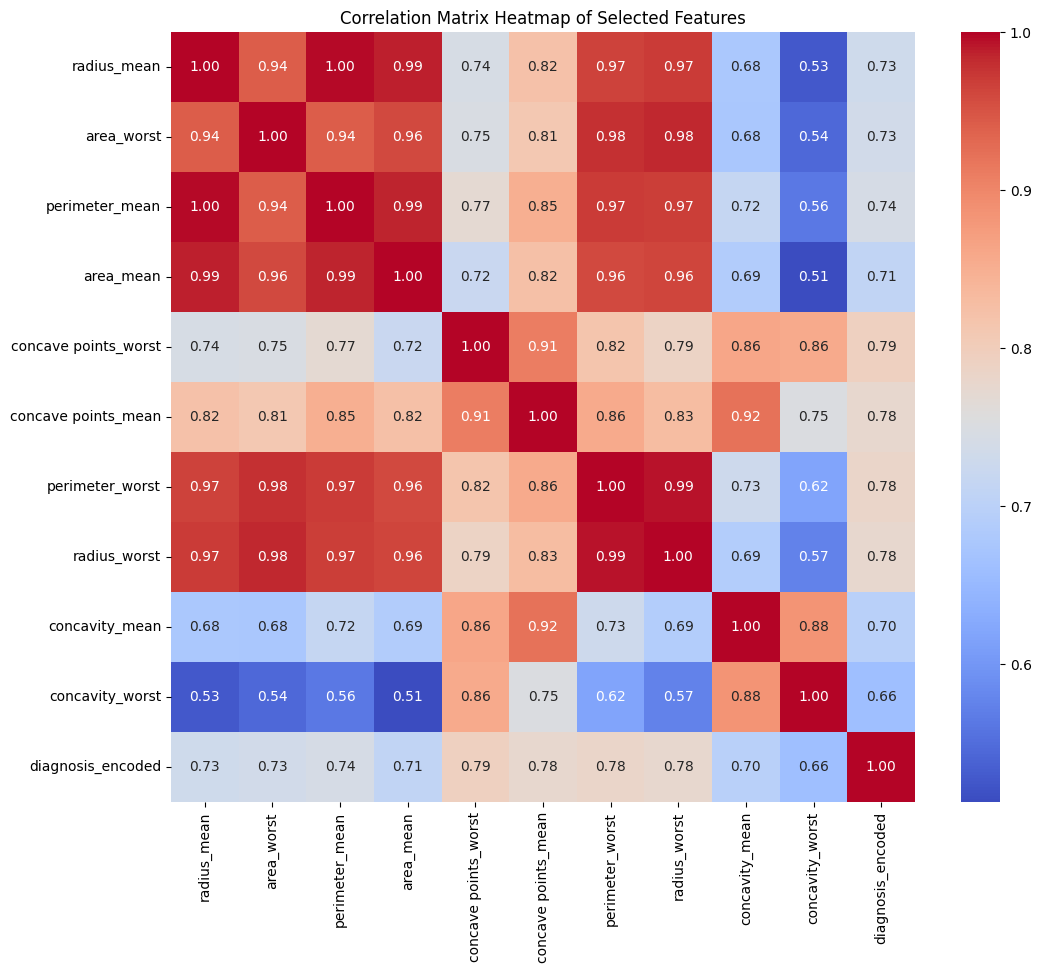

In [18]:
# Selecting features for correlation analysis
selected_features = ['radius_mean', 'area_worst', 'perimeter_mean', 'area_mean', 'concave points_worst',
                     'concave points_mean', 'perimeter_worst', 'radius_worst', 'concavity_mean', 'concavity_worst','diagnosis_encoded']

# Creating a correlation matrix
correlation_matrix = raw_data[selected_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()

In [19]:
# Select only the highly correlated features
selected_features = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst']

# Extract the selected features from the original dataset
X_selected = raw_data[selected_features].values

# Standardize the selected features
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# Print the shape of the standardized feature matrix
print('X_selected_standardized.shape =', X_selected_standardized.shape)


X_selected_standardized.shape = (569, 10)


### Model Training
#### Train/Test dataset

split the dataset into train and test set

In [20]:
X = np.asarray(X_selected_standardized)
X[0:5]

array([[ 2.29607613,  2.30360062,  2.53247522,  1.88668963,  1.26993369,
         2.00123749,  1.09706398,  0.9843749 ,  2.65287398,  2.10952635],
       [ 1.0870843 ,  1.53512599,  0.54814416,  1.80592744,  1.68595471,
         1.89048899,  1.82982061,  1.90870825, -0.02384586, -0.14674897],
       [ 1.95500035,  1.34747521,  2.03723076,  1.51187025,  1.56650313,
         1.45628455,  1.57988811,  1.55888363,  1.36347845,  0.85497394],
       [ 2.17578601, -0.2499393 ,  1.45170736, -0.28146446, -0.59268717,
        -0.55002123, -0.76890929, -0.76446379,  1.91589718,  1.98958826],
       [ 0.72925926,  1.33853946,  1.42849277,  1.29857524,  1.77657315,
         1.22072425,  1.75029663,  1.82622928,  1.37101143,  0.61317876]])

In [21]:
y = np.asarray(raw_data['diagnosis_encoded'])
y [0:5]

array([1, 1, 1, 1, 1])

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (398, 10) (398,)
Test set: (171, 10) (171,)


### Modeling (SVM with Scikit-learn)

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

After being fitted, the model can then be used to predict new values

In [24]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 0, 1, 1, 1])

### Model Evaluation

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       117
           1       0.84      0.96      0.90        54

    accuracy                           0.93       171
   macro avg       0.91      0.94      0.92       171
weighted avg       0.94      0.93      0.93       171

Confusion matrix, without normalization
[[107  10]
 [  2  52]]


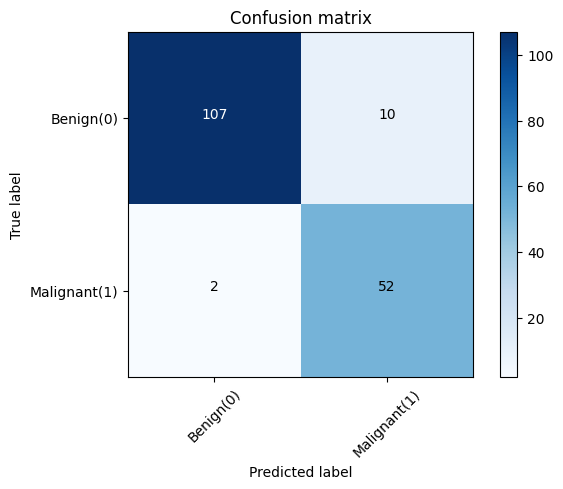

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix')

### Prediction

In [27]:
from sklearn.metrics import f1_score
print("f1 score")
print(f1_score(y_test, yhat, average='weighted'))
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("training accuracy")
print(accuracy_score(y_train,y_train_pred))
print("testing accuracy")
print(accuracy_score(y_test,y_test_pred))

f1 score
0.9310023609527328
training accuracy
0.9547738693467337
testing accuracy
0.9298245614035088
